### 6.3 The secant method

When findung the derivative $f'(x)$ in Newton's method is problematic, or when function evalutations take too long; we maya adjust the method slightly.

Instead of using tangent lines to the graph we may use secants.
The approach is reffered to as the $secant$ $method$, and the idea is illustrated graphically in Figure 6.2 for our example problem $x^2 -9 =0$.

The idea of the secant method is to think as in Newton's method, but instead of using $f'(x_n)$, we approximate this derivative by a finite difference or the $secant$, i.e., the slope of the straight line that goes through the two most recent approximations $x_n$ and $x_{n+1}$. This slope reads

$$\frac{f(x_n)-f(x_{n-1})}{x_{n}-x_{n-1}}$$

Inserting this expression for $f'(x_n)$ in Newton's method simply gives us the secant method:
$$x_{n+1} = x_{n}-\frac{f(x_n)}{\frac{f(x_n)-f(x_{n-1})}{x_{n}-x_{n-1}}},$$
or
$$x_{n+1} = x_{n}-f(x_n)\frac{x_n-x_{n-1}}{f(x_n)-f(x_{n-1})}$$

1       499.7543771886,    249745.4375191598
2       333.1190423263,    110959.2963603872
3       199.8943604472,     39948.7553386128
4       124.9454846202,     15602.3741269820
5        76.9145106991,      5906.8419560794
6        47.6524375145,      2261.7548010704
7        29.4954959380,       860.9842806296
8        18.3353229807,       327.1840688065
9        11.4948783426,       123.1322281121
10         7.3671077394,        45.2742764435
11         4.9668156256,        15.6692574583
12         3.6963960685,         4.6633438951
13         3.1581033360,         0.9736166807
14         3.0160628129,         0.0966348915
15         3.0004113243,         0.0024681147
16         3.0000010982,         0.0000065889
17         3.0000000001,         0.0000000005
Number of function calls: 19
A solution is: 3.000000
1       411.7700000000,    169545.5329000000
2       259.2694532142,     67211.6493700131
3       159.1089499114,     25306.6579419041
4        98.6214635764,      9717.19307

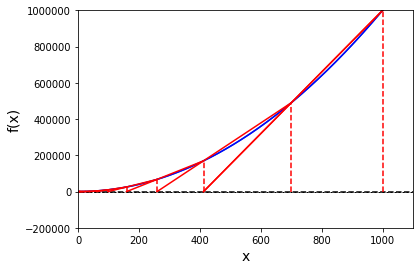

In [9]:
def secant(f, x0, x1, eps):
    f_x0 = f(x0)
    f_x1 = f(x1)
    iteration_counter = 0
    while abs(f_x1) > eps and iteration_counter < 100:
        try:
            denominator = float(f_x1 - f_x0)/(x1 - x0)
            x = x1 - float(f_x1) / denominator
            print('%d % 20.10f, % 20.10f' % (iteration_counter+1, x, f(x)))
        except ZeroDivisionError:
            print("Error! - denominator zero for x = ", x)
            sys.exit(1)  # Abort with error
        x0 = x1
        x1 = x
        f_x0 = f_x1
        f_x1 = f(x1)
        iteration_counter += 1
    # Here, either a solution is found, or too many iterations
    if abs(f_x1) > eps:
        iteration_counter = -1
    return x, iteration_counter

def f(x):
    return x**2 - 9
    
x0 = 1000; x1 = x0 - 1  # x1 = x0 - 1, 100, 996.9, 997 (not available), 999

solution, no_iterations = secant(f, x0, x1, eps=1.0e-6)
#print(x0)
#print(x1)
import matplotlib.pyplot as plt
import numpy as np 
x = np.linspace(0, 1200, 100)
x2= x**2 

fig,ax = plt.subplots()
ax.plot(x,x2)
plt.xlabel('x',fontsize=14)
plt.ylabel('f(x)',fontsize=14)
plt.xlim(0,1100)
plt.ylim(-200000,1000000)
y3 = 1000*(x-500)+249745
#ax.plot(x,y3)
#y4 = 500*(x-250)+62496
#ax.plot(x,y4)
#y5 = 240*(x-125)+15621
#ax.plot(x,y5)
plt.plot([0, 100000], [0, 0], 'k-', lw=1,dashes=[2, 2])
#plt.plot([500, 500], [0, 249995], 'k-', lw=1,dashes=[2, 2])
#plt.plot([250, 250], [0, 62496], 'k-', lw=1,dashes=[2, 2])
#plt.plot([125, 125], [0, 15621], 'k-', lw=1,dashes=[2, 2])
if no_iterations > 0:  # Solution found
    print("Number of function calls: %d" % (2 + no_iterations)) # f(0), f(1), while loop
    print("A solution is: %f" % (solution))
else:
    print("Solution not found!")
import matplotlib.pyplot as plt
import numpy as np


def secant(f, x0, x1, eps):
    f_x0 = f(x0)
    f_x1 = f(x1)

    # no iteration
    x = np.arange(1,x0)
    y = f(x)
    plt.plot(x, y, color='b')
    plt.axhline(y=0, color='k', linestyle='--')
    
    # Initial point of iteration
    plt.plot([x0,x0],[0,f_x0], color='r', linestyle='--')
    plt.plot([x1,x1],[0,f_x1], color='r', linestyle='--')

    denominator = float(f_x1 - f_x0)/(x1 - x0)
    plt.plot([x0,x0-f_x0/denominator],[f_x0,0],color='r', linestyle='-')
    
    iteration_counter = 0
    while abs(f_x1) > eps and iteration_counter < 100:
        try:
            denominator = float(f_x1 - f_x0)/(x1 - x0)
            x = x1 - float(f_x1) / denominator
            print('%d % 20.10f, % 20.10f' % (iteration_counter+1, x, f(x)))
        except ZeroDivisionError:
            print("Error! - denominator zero for x = ", x)
            sys.exit(1)  # Abort with error
        plt.plot([x0,x0-f_x0/denominator],[f_x0,0],color='r', linestyle='-')
        x0 = x1
        x1 = x
        f_x0 = f_x1
        f_x1 = f(x1)
        plt.plot([x1,x1],[0,f_x1], color='r', linestyle='--')
  
        iteration_counter += 1
    # Here, either a solution is found, or too many iterations
    if abs(f_x1) > eps:
        iteration_counter = -1
    return x, iteration_counter

def f(x):
    return x**2 - 9
    
x0 = 1000; x1 = 700  # x1 = x0 - 1, 100, 996.9, 997 (not available), 999

solution, no_iterations = secant(f, x0, x1, eps=1.0e-6)


if no_iterations > 0:  # Solution found
    print("Number of function calls: %d" % (2 + no_iterations)) # f(0), f(1), while loop
    print("A solution is: %f" % (solution))
else:
    print("Solution not found!")  

### Secant method using SciPy library

In [35]:
from scipy import optimize
import matplotlib.pyplot as plt
f = lambda x: x**2 - 9
vec_res = optimize.newton(f, 100, full_output=True)
print (vec_res)

(3.000000000000001,       converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 13
           root: 3.000000000000001)
